In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, load_model

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
import os
import seaborn as sn

In [26]:
# initialize the list of data and labels
data = []
labels = []

In [27]:
#loop over the input images
# imutils.paths.list_images : grab the image paths and randomly shuffle them
for imagePath in sorted(list(paths.list_images('datasetCNN'))):
    # print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = imutils.resize(image, width = 64)  #28
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the label list : negative, postive
    label = imagePath.split(os.path.sep)[-2]
    print(label)

    # positive(smile : 1, no-smile : 0)
    label = 1 if label == "positives" else 0 
    labels.append(label)

.ipynb_checkpoints
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
negatives
n

In [28]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype = "float") / 255.0
labels = np.array(labels)
print(data.shape, labels.shape)
print(labels)

(13166, 64, 64, 1) (13166,)
[0 0 0 ... 1 1 1]


In [14]:
# convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)
print(labels.shape)
print(labels)

(39498, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [29]:
# partition the data into training and testing splits using 80% of the data
# for training and remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size = 0.10, stratify = labels, random_state = 42)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(11849, 64, 64, 1)
(11849,)
(1317, 64, 64, 1)
(1317,)


In [30]:
num_classes = 2

trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)
print(trainY.shape)
print(testY)

(11849, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [1]:
# print(trainX)
# print(trainY)

In [31]:
print(trainX.shape)
print(trainY.shape)

(11849, 64, 64, 1)
(11849, 2)


In [78]:

''''
# 특징 추출 부분
# 합성곱 층(Conv2D)와 풀링 층(MaxPooling2D)를 번갈아가며 사용
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64,64,1)))
model.add(BatchNormalization())  
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))  

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) 

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(2,2))

# 분류기 역할의 완전 연결 신경망
# 특징 추출 부분을 거쳐온 데이터를 신경망에 입력할 수 있도록 1차원으로 변환
model.add(Flatten())
model.add(Dense(500, activation='relu'))  # 128
model.add(Dropout(0.3))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

# 10개의 클래스 분류이므로 출력층에 10개의 노드를, 활성화 함수로 softmax를 지정
model.add(Dense(2, activation='softmax'))

#######
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))

model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))

model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))

model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=2, activation="softmax"))

'''
model = Sequential()
model.add(Conv2D(20, (3, 3), padding = 'same', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# # second set of CONV => RELU => POOL layers
model.add(Conv2D(50, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# # first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

# # softmax classififer
model.add(Dense(2, activation='softmax'))



In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        9050      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 500)               6

In [79]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam",
                metrics = ["accuracy"])

In [80]:
callback1 = EarlyStopping(monitor='val_loss', patience=5)
callback2 = ModelCheckpoint(filepath='./model/bestCNN_lenet_model2.h5', 
                            monitor='val_loss',
                            save_best_only=True)
callback3 = ReduceLROnPlateau(monitor='val_accuracy', 
                            patience=3, 
                            verbose=1, 
                            factor=0.5, 
                            min_lr=0.00001)

# callback = [EarlyStopping(monitor='val_loss',
#                                     patience=10),
#              ModelCheckpoint(filepath='./model/bestCNN_model.h5',
#                              monitor='val_loss',
#                              save_best_only=True)]

In [81]:

history = model.fit(trainX, trainY, 
                    epochs=50, 
                    validation_split=0.2,
                    callbacks=[callback1, callback2, callback3])

# history = model.fit(trainX, trainY, 
#                     epochs=50, 
#                     validation_data = (testX, testY),
#                     callbacks=[callback1, callback2])

Epoch 1/50
297/297 [==============================] - 26s 84ms/step - loss: 0.4363 - accuracy: 0.7997 - val_loss: 0.2887 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 27s 91ms/step - loss: 0.2790 - accuracy: 0.8871 - val_loss: 0.2699 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 27s 92ms/step - loss: 0.2429 - accuracy: 0.9029 - val_loss: 0.2562 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 4/50
297/297 [==============================] - 26s 87ms/step - loss: 0.2190 - accuracy: 0.9142 - val_loss: 0.2553 - val_accuracy: 0.8975 - lr: 0.0010
Epoch 5/50
297/297 [==============================] - 27s 90ms/step - loss: 0.2035 - accuracy: 0.9205 - val_loss: 0.2247 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 6/50
297/297 [==============================] - 27s 90ms/step - loss: 0.1823 - accuracy: 0.9281 - val_loss: 0.2297 - val_accuracy: 0.9118 - lr: 0.0010
Epoch 7/50
297/297 [==============================] - 26s 

In [77]:
print(history.history)
# save the model to disk
# model.save('model/model_cnn_drop_br_64.h5')


{'loss': [0.4334833025932312, 0.2804775834083557, 0.24573668837547302, 0.22381052374839783, 0.21000227332115173, 0.18836204707622528, 0.17550256848335266, 0.1543373465538025, 0.14338821172714233, 0.13725262880325317, 0.12741446495056152, 0.10992588102817535], 'accuracy': [0.8366881608963013, 0.8822636008262634, 0.8990694880485535, 0.9085643887519836, 0.9165400862693787, 0.9266995787620544, 0.9308773279190063, 0.940467119216919, 0.9446448683738708, 0.946164071559906, 0.9509115219116211, 0.9589821696281433], 'val_loss': [1.4973214864730835, 0.3453139066696167, 0.26114150881767273, 0.22410175204277039, 0.23256762325763702, 0.23171432316303253, 0.20714814960956573, 0.2213442325592041, 0.20157253742218018, 0.2602328062057495, 0.24952295422554016, 0.33098304271698], 'val_accuracy': [0.46165528893470764, 0.8826879262924194, 0.8948367238044739, 0.9233105778694153, 0.9145786166191101, 0.9058465957641602, 0.9339407682418823, 0.9274867177009583, 0.927107036113739, 0.9236901998519897, 0.9252088069

In [82]:
# new_model = load_model('./model/bestCNN_model.h5')
test_loss, test_acc = model.evaluate(testX, testY)

42/42 [==============================] - 1s 14ms/step - loss: 0.2773 - accuracy: 0.9332


In [10]:
model = load_model('./model/bestCNN_lenet_model.h5')

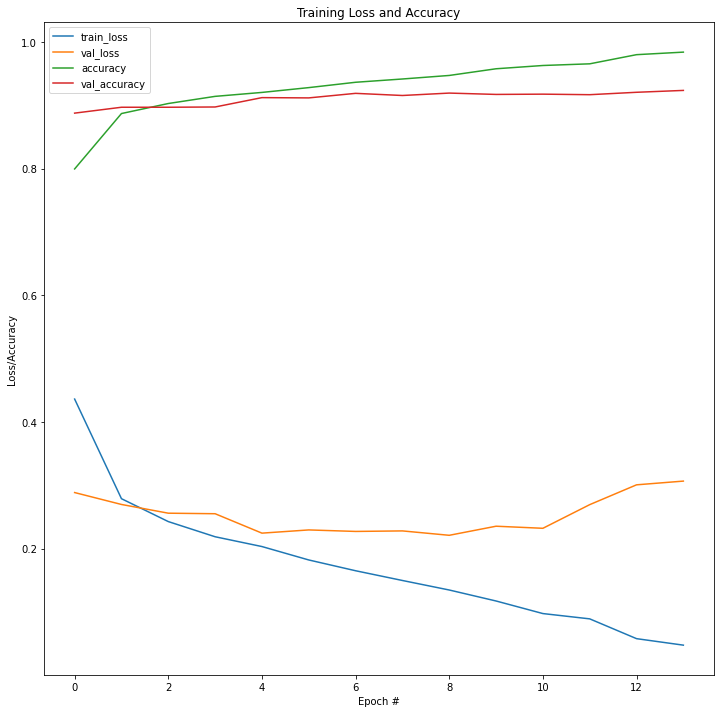

In [83]:
# plot the training + testing loss and accuracy
plt.figure(figsize=(12, 12))
plt.plot(np.arange(0, 14), history.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 14), history.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 14), history.history["accuracy"], label = "accuracy")
plt.plot(np.arange(0, 14), history.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('output')
plt.show()


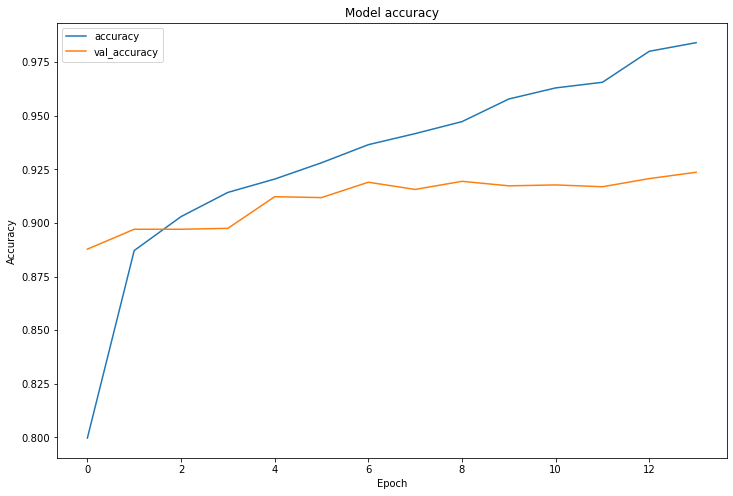

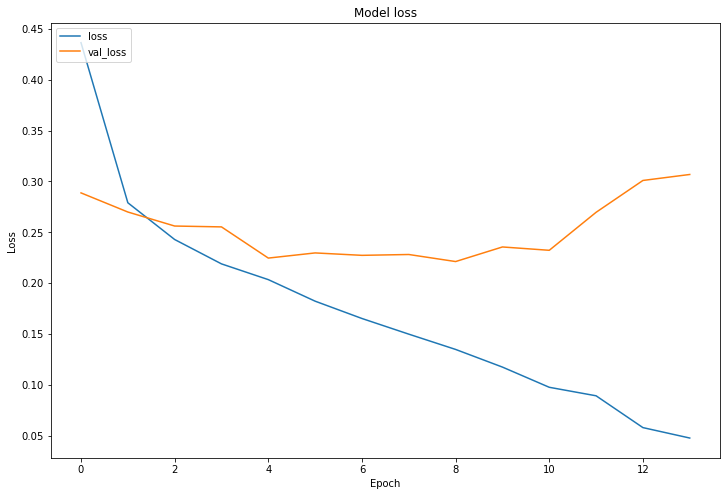

In [84]:
# 정확도
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# 손실
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [49]:
pred = model.predict(testX)

In [50]:
print(pred)

[[9.9987400e-01 1.2597471e-04]
 [1.0000000e+00 3.6066360e-12]
 [9.9603587e-01 3.9641112e-03]
 ...
 [9.3612354e-03 9.9063873e-01]
 [9.9999833e-01 1.6113092e-06]
 [1.0145740e-02 9.8985428e-01]]


In [51]:
print(np.argmax(pred, axis=1))

[0 0 0 ... 1 0 1]


In [52]:
print(np.argmax(testY[100:110], axis=1))

[1 0 0 1 0 0 0 0 0 1]


In [87]:
testX = testX.reshape(-1, 64, 64)
print(testX.shape)

(1317, 64, 64)


1 0 0 1 0 0 0 0 0 1 

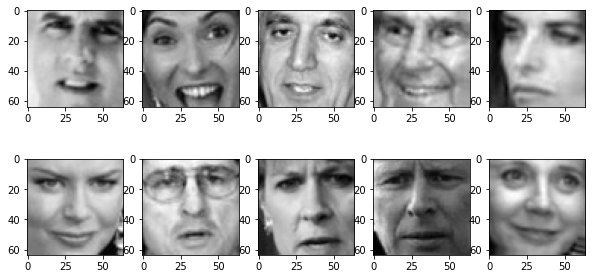

In [88]:
fig, axs = plt.subplots(2, 5, figsize = (10, 5))
for i in range(2):
    for j in range(5):
        print(np.argmax(testY[i*5+j+100]), end=' ')
        axs[i, j].imshow(testX[i*5+j+100], cmap='gray')
        
plt.show()

In [85]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

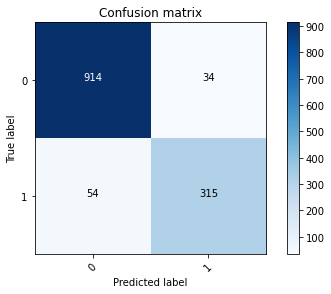

In [86]:
# Predict the values from the test dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert test observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [13]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    
    print(image.shape)
    plt.imshow(image)
    

(64, 64)


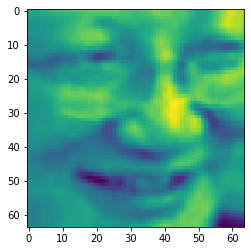

In [14]:
show_image('./datasetCNN/positives/10012.jpg')

In [89]:
def make_predictions(image_path):
    show_image(image_path)
    
    image = image_utils.load_img(image_path, target_size=(64, 64))
    print('1', image)
    
    image = image_utils.img_to_array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print('2', image.shape)
    # print(image)
    
    image = image.reshape(1,64,64,1)
    print('3', image.shape)
    
    # image = preprocess_input(image)
    
    preds = model.predict(image)
    return preds

1 <PIL.Image.Image image mode=RGB size=64x64 at 0x7FE863E7CB90>
2 (64, 64)
3 (1, 64, 64, 1)
[[1. 0.]]
0
no-smile


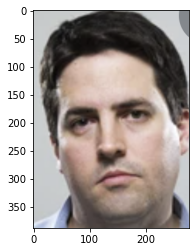

In [90]:
classes = {0:'no-smile', 1:'smile'}

# pred = make_predictions('./datasetCNN/negatives/10.jpg')
pred = make_predictions('./testImg/08.png')
print(pred)
print(np.argmax(pred))
print(classes[np.argmax(pred)])

1 <PIL.Image.Image image mode=RGB size=64x64 at 0x7FE862EF2ED0>
2 (64, 64)
3 (1, 64, 64, 1)
no-smile


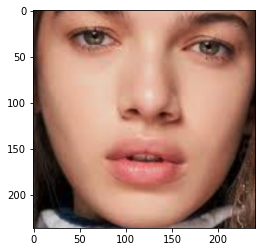

In [91]:
# pred = make_predictions('./datasetCNN/positives/100.jpg')
# pred = make_predictions('./datasetCNN/positives/10046.jpg')
pred = make_predictions('./testImg/07.png')
# print(pred)
# print(np.argmax(pred))
print(classes[np.argmax(pred)])